In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier, LogisticRegression
import numpy as np
import seaborn as sns
pd.options.display.expand_frame_repr = True

/home/ubuntu/work/code/external/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


$\theta = (X^T X)^{-1}X^T y$

derived by zeroing gradients of mean squared error

QA

* why transform features non-linearly ? to deal with non-linearly separable cases
* the diff between train and test error is the epsilon in hoefding ineq
* we can use linear regression directly for classification (-1 and 1 as targets), plus add a threshold to decide to vote for class +1 or class -1. what does this change ?  regression will try to make all targets of positive labels +1 and all the targets of negative labels -1, wheeras in  classification we are only interested in the sign. as a result, a target of -2 for a class -1 is considered as an error in regression whereas it is correct in classiccation. the regression case will try to move the line so that all targets of all the positives points is 1  and all the targets of all negative points is -1, which is not reall possible unless the points are replicates.

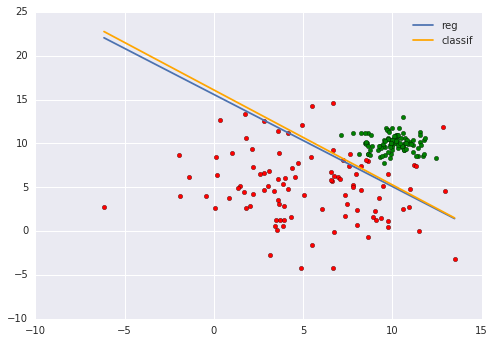

In [91]:
c1 = np.random.normal(5, 4, size=(100, 2))
c2 = np.random.normal(10, 1, size=(100, 2))
x = np.concatenate((c1, c2), axis=0)
y = [1] * len(c1) + [-1] * len(c2)
y = np.array(y)
reg = LinearRegression()
reg = reg.fit(x, y)
clf = LogisticRegression()
clf = clf.fit(x, y)
v1 = [-reg.coef_[1], reg.coef_[0]] # https://fr.wikipedia.org/wiki/Vecteur_directeur
v1 = np.array(v1)

n1 = x[:,0].min()
m1 = (-reg.coef_[0] * n1 - reg.intercept_) / reg.coef_[1]
n2 =  x[:,0].max()
m2 = (-reg.coef_[0] * n2 - reg.intercept_) / reg.coef_[1]
plt.plot([n1, n2], [m1, m2], label='reg')

n1 = x[:,0].min()
m1 = (-clf.coef_[0,0] * n1 - clf.intercept_) / clf.coef_[0,1]
n2 = x[:,0].max()
m2 = (-clf.coef_[0,0] * n2 - clf.intercept_) / clf.coef_[0,1]
plt.plot([n1, n2], [m1, m2], c='orange', label='classif')

plt.scatter(c1[:, 0], c1[:, 1], c='red')
plt.scatter(c2[:, 0], c2[:, 1], c='green')
plt.legend()

In [92]:
df = pd.read_csv('amazon-fine-foods/Reviews.csv')

In [ ]:
df.sample(5)

In [ ]:
X = df['Text']
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
tf = TfidfVectorizer().fit(X_train)

In [ ]:
reg = LogisticRegression(verbose=1)
#reg = LinearRegression()
reg.fit(tf.transform(X_train), y_train)

In [ ]:
(reg.predict(tf.transform(X_test)) == y_test).mean()

In [ ]:
len(tf.get_feature_names())

In [ ]:
plt.bar()

In [ ]:
df = {'names': tf.get_feature_names(), 'imp': reg.coef_[0]}
df = pd.DataFrame(df)
df = df.sort_values(by='imp', ascending=False)
nb = 20
df = pd.concat((df.iloc[0:nb], df.iloc[-1:-nb:-1]))
Chart(df).mark_bar().encode(x='names', y='imp')

In [ ]:
Chart(df).encode.__docs__

In [ ]:
## linear regression